In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FRAME_SIZE = 1024
HOP_SIZE = 512

In [4]:
police_car_file = "C:/Users/davis/projects/acoustic_alert_detector/data/ESC-50-master/audio/1-76831-D-42.wav"
fire_truck_file = "C:/Users/davis/projects/acoustic_alert_detector/data/ESC-50-master/audio/3-51731-B-42.wav"
catastroph_file = "C:/Users/davis/projects/acoustic_alert_detector/data/ESC-50-master/audio/3-51376-A-42.wav"

path = [police_car_file, fire_truck_file, catastroph_file]

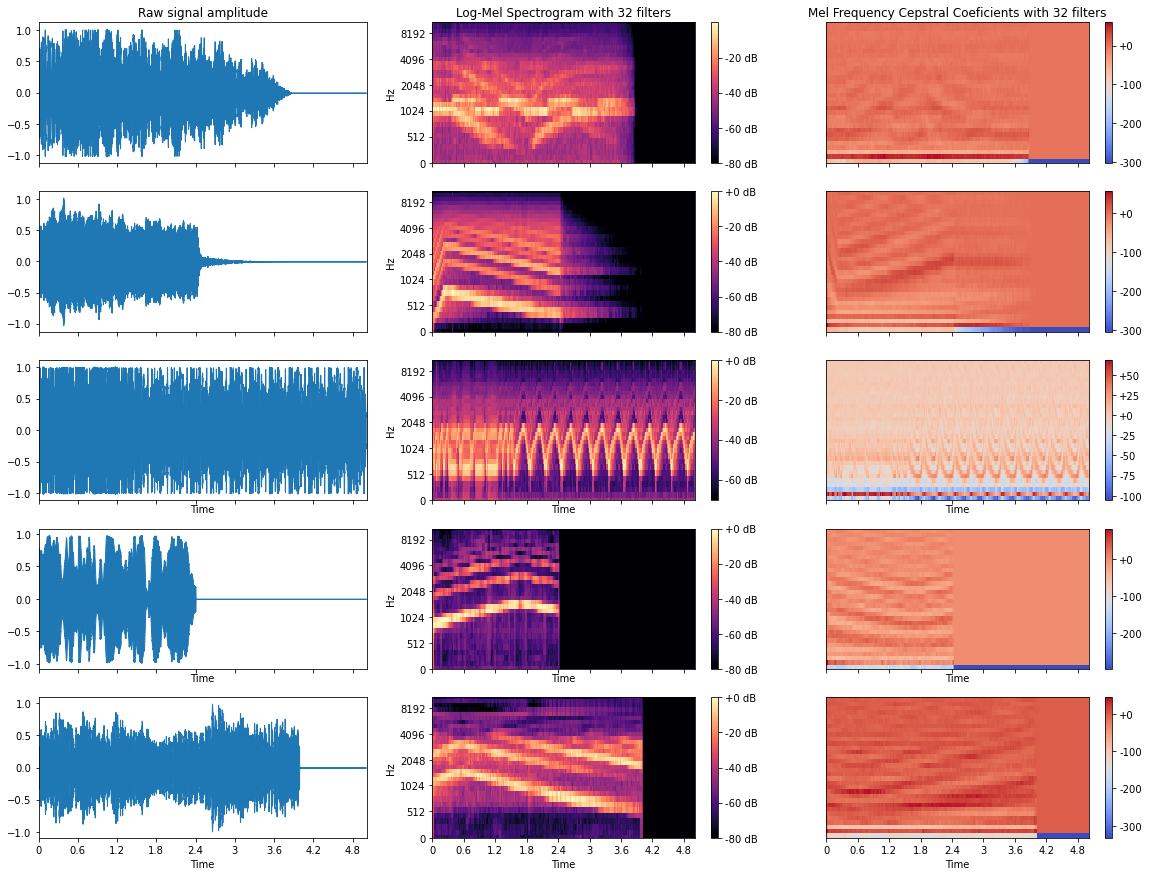

In [6]:
fig, ax =  plt.subplots(nrows=len(path), ncols=3, sharex=True, figsize=(20,15))
for i, p in enumerate(path):
    y, sr = librosa.load(p)
    librosa.display.waveplot(y, sr, ax=ax[i, 0])
    
    S = librosa.feature.melspectrogram(y, sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=32)
    img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax=ax[i, 1])  
    fig.colorbar(img, ax=ax[i, 1], format="%+2.f dB")

    mfcc = librosa.feature.mfcc(y, n_mfcc=32, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=32) 
    img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[i, 2]) 
    fig.colorbar(img, ax=ax[i, 2], format="%+2.f")

ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[0, 2].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[1, 2].set_xlabel('')
ax[0, 0].title.set_text('Raw signal amplitude')
ax[0, 1].title.set_text('Log-Mel Spectrogram with 32 filters')
ax[0, 2].title.set_text('Mel Frequency Cepstral Coeficients with 32 filters')
